<a href="https://colab.research.google.com/github/kayiwa/SBU_ML_CYBER/blob/main/PhishingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
from scipy.io.arff import loadarff 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

dataset = pd.read_csv("/content/gdrive/My Drive/Phishing.csv")
orig_dataset = dataset


In [ ]:
dataset.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


Dataset has 11,055 rows and 31 columns

1 is legitimate<br>
0 is suspicious<br>
-1 is phishy<br>
<br>
Some columns contain the values 1 and -1 and some contain the values 1, 0 and -1

This last column is the result<br>
1: Website is legitimate<br>
-1: Website is phishy
<br><br>

Data seems balanced with 55.7% of dataset class non-phishing and 44.3% phishing

 1    6157
-1    4898
Name: Result, dtype: int64


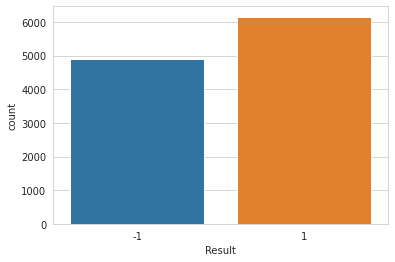

In [ ]:
sns.countplot(dataset['Result'])
print(dataset['Result'].value_counts())

Checking for empty values

In [ ]:
dataset.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## Feature correlation
Acquiring the correlation and sorting the values

In [ ]:
print(dataset.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


Heat map

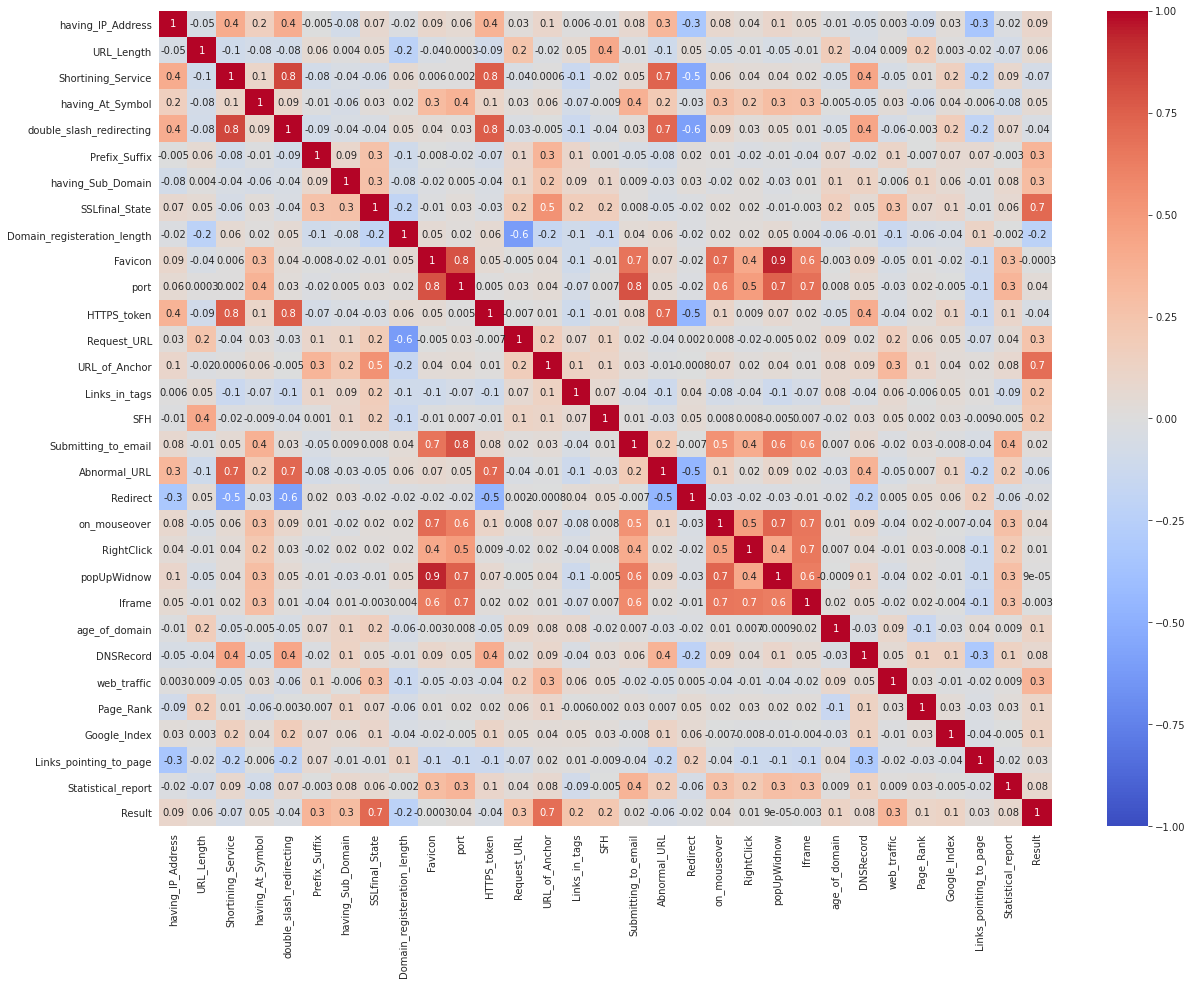

In [ ]:

corr = dataset.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Density Plots (blue is phishing)

<Figure size 432x288 with 0 Axes>

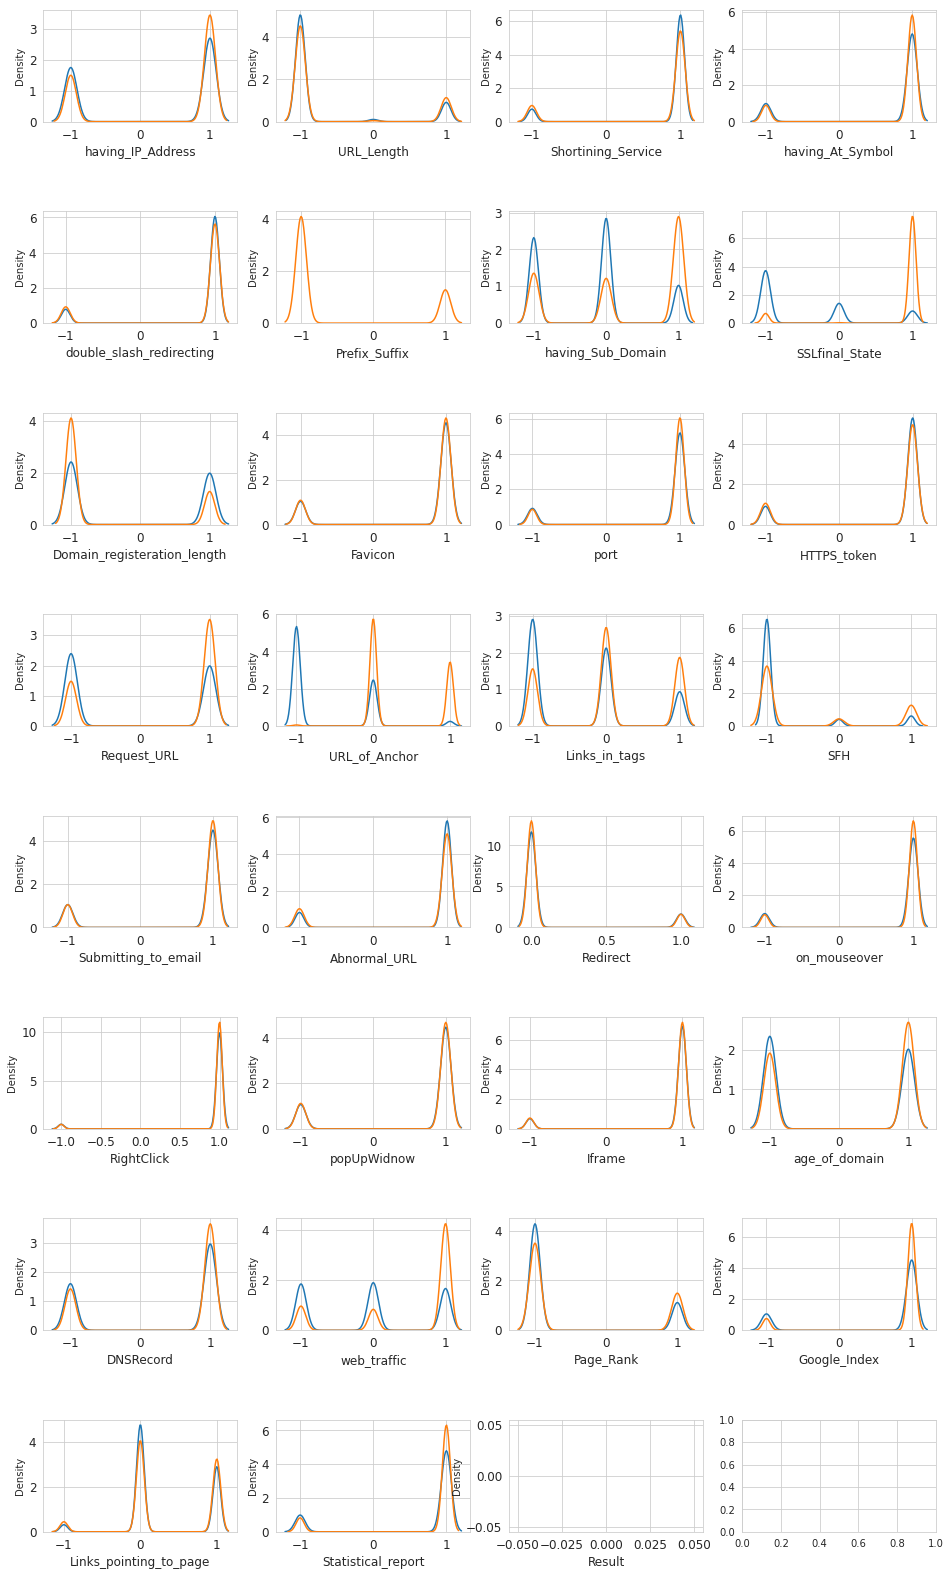

In [ ]:

var = dataset.columns.values
i = 0
t0 = dataset.loc[dataset['Result'] == -1]
t1 = dataset.loc[dataset['Result'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
plt.subplots_adjust(hspace = 0.8)

for feature in var:
  i += 1
  plt.subplot(8,4,i)
  sns.kdeplot(t0[feature], bw_adjust=0.5,label="Class = 0")
  sns.kdeplot(t1[feature], bw_adjust=0.5,label="Class = 1")
  plt.xlabel(feature, fontsize=12)
  locs, labels = plt.xticks()
  plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()



## Data Cleanup
In binary fields, changing 1 to 0 indicating non-phishing and -1 to 1 indicating phishing

In [ ]:
dataset['Result'] = dataset['Result'].replace([1],0)
dataset['Result'] = dataset['Result'].replace([-1],1)

dataset['having_IP_Address'] = dataset['having_IP_Address'].replace([1],0)
dataset['having_IP_Address'] = dataset['having_IP_Address'].replace([-1],1)

dataset['Request_URL'] = dataset['Request_URL'].replace([1],0)
dataset['Request_URL'] = dataset['Request_URL'].replace([-1],1)

dataset['Shortining_Service'] = dataset['Shortining_Service'].replace([1],0)
dataset['Shortining_Service'] = dataset['Shortining_Service'].replace([-1],1)

dataset['having_At_Symbol'] = dataset['having_At_Symbol'].replace([1],0)
dataset['having_At_Symbol'] = dataset['having_At_Symbol'].replace([-1],1)

dataset['double_slash_redirecting'] = dataset['double_slash_redirecting'].replace([1],0)
dataset['double_slash_redirecting'] = dataset['double_slash_redirecting'].replace([-1],1)

dataset['Prefix_Suffix'] = dataset['Prefix_Suffix'].replace([1],0)
dataset['Prefix_Suffix'] = dataset['Prefix_Suffix'].replace([-1],1)

dataset['Domain_registeration_length'] = dataset['Domain_registeration_length'].replace([1],0)
dataset['Domain_registeration_length'] = dataset['Domain_registeration_length'].replace([-1],1)

dataset['Favicon'] = dataset['Favicon'].replace([1],0)
dataset['Favicon'] = dataset['Favicon'].replace([-1],1)

dataset['port'] = dataset['port'].replace([1],0)
dataset['port'] = dataset['port'].replace([-1],1)

dataset['HTTPS_token'] = dataset['HTTPS_token'].replace([1],0)
dataset['HTTPS_token'] = dataset['HTTPS_token'].replace([-1],1)

dataset['Submitting_to_email'] = dataset['Submitting_to_email'].replace([1],0)
dataset['Submitting_to_email'] = dataset['Submitting_to_email'].replace([-1],1)

dataset['Abnormal_URL'] = dataset['Abnormal_URL'].replace([1],0)
dataset['Abnormal_URL'] = dataset['Abnormal_URL'].replace([-1],1)

dataset['Redirect'] = dataset['Redirect'].replace([1],0)
dataset['Redirect'] = dataset['Redirect'].replace([0],1)

dataset['on_mouseover'] = dataset['on_mouseover'].replace([1],0)
dataset['on_mouseover'] = dataset['on_mouseover'].replace([-1],1)

dataset['RightClick'] = dataset['RightClick'].replace([1],0)
dataset['RightClick'] = dataset['RightClick'].replace([-1],1)

dataset['popUpWidnow'] = dataset['popUpWidnow'].replace([1],0)
dataset['popUpWidnow'] = dataset['popUpWidnow'].replace([-1],1)

dataset['Iframe'] = dataset['Iframe'].replace([1],0)
dataset['Iframe'] = dataset['Iframe'].replace([-1],1)

dataset['age_of_domain'] = dataset['age_of_domain'].replace([1],0)
dataset['age_of_domain'] = dataset['age_of_domain'].replace([-1],1)

dataset['DNSRecord'] = dataset['DNSRecord'].replace([1],0)
dataset['DNSRecord'] = dataset['DNSRecord'].replace([-1],1)

dataset['Page_Rank'] = dataset['Page_Rank'].replace([1],0)
dataset['Page_Rank'] = dataset['Page_Rank'].replace([-1],1)

dataset['Google_Index'] = dataset['Google_Index'].replace([1],0)
dataset['Google_Index'] = dataset['Google_Index'].replace([-1],1)

dataset['Statistical_report'] = dataset['Statistical_report'].replace([1],0)
dataset['Statistical_report'] = dataset['Statistical_report'].replace([-1],1)






For ternary fields, implementing one-hot encoding

In [ ]:
dataset = pd.get_dummies(dataset, columns=["SSLfinal_State", "URL_of_Anchor", "Links_in_tags", "URL_Length", "having_Sub_Domain", "SFH", 'web_traffic', 'Links_pointing_to_page'])

dataset = dataset.rename(columns={"SSLfinal_State_-1": "SSLfinal_State_Not_Using_HTTPS", "SSLfinal_State_0": "SSLfinal_State_HTTP_Issuer_Not_Trusted", "SSLfinal_State_1": "SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year"})

dataset = dataset.rename(columns={"URL_of_Anchor_-1": "URL_of_Anchor_Different_Domains_GT_67", "URL_of_Anchor_0": "URL_of_Anchor_Different_Domains_BT_31_67", "URL_of_Anchor_1": "URL_of_Anchor_Different_Domains_LT_31"})

dataset = dataset.rename(columns={"Links_in_tags_-1": "Links_in_tags_LT_17", "Links_in_tags_0": "Links_in_tags_BT_17_81", "Links_in_tags_1": "Links_in_tags_GT_81"})

dataset = dataset.rename(columns={"URL_Length_-1": "URL_Length_GT_75", "URL_Length_0": "URL_Length_BT_54_75", "URL_Length_1": "URL_Length_LT_54"})

dataset = dataset.rename(columns={"having_Sub_Domain_-1": "having_Sub_Domain_GT_2_Dots", "having_Sub_Domain_0": "having_Sub_Domain_2_Dots", 'having_Sub_Domain_1': 'having_Sub_Domain_1_Dot'})

dataset = dataset.rename(columns={"SFH_-1": "SFH_Form_Action_Empty", "SFH_0": "SFH_Form_Different_Domain", 'SFH_1': 'SFH_OK'})

dataset = dataset.rename(columns={"web_traffic_-1": "web_traffic_No_Rank", "web_traffic_0": "web_traffic_Rank_GT_100K", 'web_traffic_1': 'web_traffic_Rank_LT_100K'})

dataset = dataset.rename(columns={"Links_pointing_to_page_-1": "Links_pointing_to_page_0_Links", "Links_pointing_to_page_0": "Links_pointing_to_page_BT_0_2", 'Links_pointing_to_page_1': 'Links_pointing_to_page_GT_2'})


## Creating the feature sets

In [ ]:
magnificentSeven = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted', 'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                            'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67', 'URL_of_Anchor_Different_Domains_LT_31',
                            'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                            'Domain_registeration_length', 'Request_URL',
                            'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                            'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K']]

dirtyDozen = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted', 'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                            'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67', 'URL_of_Anchor_Different_Domains_LT_31',
                            'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                            'Domain_registeration_length','Request_URL',
                            'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                            'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                            'Prefix_Suffix', 'Google_Index', 'age_of_domain', 'having_IP_Address', 
                            'URL_Length_GT_75', 'URL_Length_BT_54_75', 'URL_Length_LT_54']]

thirty_features = dataset[['having_IP_Address',
                              'SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year', 
                              'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                              'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81', 
                          'Domain_registeration_length', 'Request_URL', 
                          'URL_Length_GT_75', 'URL_Length_BT_54_75', 'URL_Length_LT_54',
                           'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
                            'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                             'Favicon', 'port', 'HTTPS_token', 
                             'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                              'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
                              'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                               'Page_Rank', 'Google_Index',
                                'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                                'Statistical_report']]


top_six = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81'
                  ]]

top_ten = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain'
                  ]]

top_fifteen = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain',
                   'Domain_registeration_length',
                   'having_IP_Address',
                   'Page_Rank',
                   'DNSRecord',
                   'Google_Index'
                  ]]

top_twenty = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain',
                   'Domain_registeration_length',
                   'having_IP_Address',
                   'Page_Rank',
                   'DNSRecord',
                   'Google_Index',
                   'URL_Length_GT_75', 'URL_Length_BT_54_75', 'URL_Length_LT_54',
                   'HTTPS_token', 
                   'Submitting_to_email', 
                   'Shortining_Service',
                   'Statistical_report'
                  ]]

top_twentyfive = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain',
                   'Domain_registeration_length',
                   'having_IP_Address',
                   'Page_Rank',
                   'DNSRecord',
                   'Google_Index',
                   'URL_Length_GT_75', 'URL_Length_BT_54_75', 'URL_Length_LT_54',
                   'HTTPS_token', 
                   'Submitting_to_email', 
                   'Shortining_Service',
                   'Statistical_report',
                   'having_At_Symbol',
                   'popUpWidnow',
                   'Abnormal_URL',
                   'Favicon',
                   'double_slash_redirecting'
                  ]]

## Splitting the dataset into Training and Test sets

In [ ]:
y = dataset['Result'].values

#Change between dirtyDozen, magnificentSeven, thirty_features, top_six, top_ten, top_fifteen, top_twenty, top_twentyfive
X_train, X_test, y_train, y_test = train_test_split(thirty_features, y, test_size = 0.20, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 8844 samples.
Testing set has 2211 samples.


# Logistic Regression

## Training the Logistic Regression on the Training Set

In [ ]:

classifier = LogisticRegression(random_state = 0, solver='newton-cg')
classifier.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[1 1]
 [1 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1134   63]
 [  90  924]]
0.9308005427408412


Text(91.68, 0.5, 'Predicted')

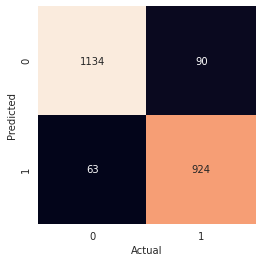

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1224
           1       0.91      0.94      0.92       987

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



# K-Nearest Neighbors

## Training the K-Nearest Neighbors on the Training Set

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 


[[1 1]
 [1 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1171   26]
 [  57  957]]
0.9624604251469923


Text(91.68, 0.5, 'Predicted')

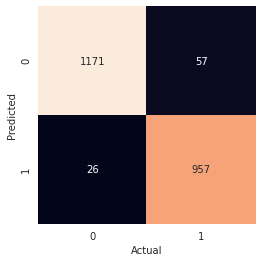

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1228
           1       0.94      0.97      0.96       983

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Support Vector Machine

## Training the Support Vector Machine on the Training Set

In [ ]:

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 


[[1 1]
 [1 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1136   61]
 [  90  924]]
0.9317051108095884


Text(91.68, 0.5, 'Predicted')

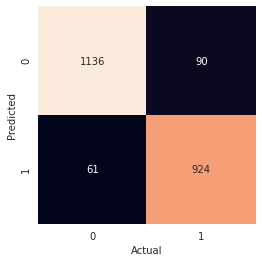

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1226
           1       0.91      0.94      0.92       985

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



# Kernel SVM

## Training the SVM on the Training Set

In [ ]:

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 


[[1 1]
 [1 1]
 [0 1]
 ...
 [0 0]
 [1 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1157   40]
 [  63  951]]
0.9534147444595206


Text(91.68, 0.5, 'Predicted')

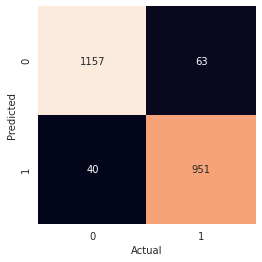

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1220
           1       0.94      0.96      0.95       991

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



# Naive Bayes

## Training the Naive Bayes on the Training Set

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[931 266]
 [ 24 990]]
0.8688376300316599


Text(91.68, 0.5, 'Predicted')

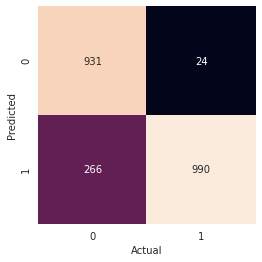

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       955
           1       0.98      0.79      0.87      1256

    accuracy                           0.87      2211
   macro avg       0.88      0.88      0.87      2211
weighted avg       0.89      0.87      0.87      2211



# Decision Tree

## Training the Decision Tree on the Training Set

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = classifier.fit(X_train, y_train)


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[1 1]
 [1 1]
 [0 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1176   21]
 [  60  954]]
0.9633649932157394


Text(91.68, 0.5, 'Predicted')

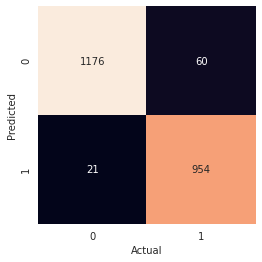

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1236
           1       0.94      0.98      0.96       975

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Random Forest

## Training the Random Forest on the Training Set

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 


[[1 1]
 [1 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1181   16]
 [  54  960]]
0.968340117593849


Text(91.68, 0.5, 'Predicted')

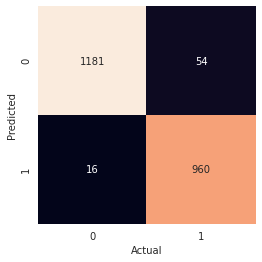

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Random Forest Features Importances
Letting the model select the number of important features

6


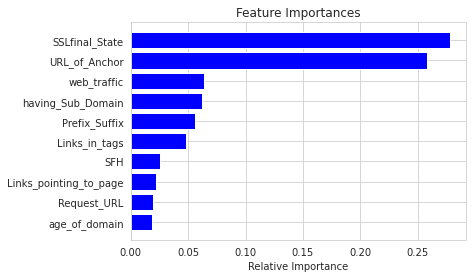

In [ ]:
from sklearn.feature_selection import SelectFromModel

X_orig = orig_dataset.iloc[:, :-1]
y_orig = orig_dataset.iloc[:, -1]
features = orig_dataset.columns

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size = 0.20, random_state = 0)

classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier.fit(X_train_orig, y_train_orig)

feature = SelectFromModel(classifier)
Fit = feature.fit_transform(X_train_orig, y_train_orig)

importantFeaturesCount = Fit.shape[1]
# number of important features shown below: 6 is the amount it returned
print(importantFeaturesCount)

selected_feat= X_train_orig.columns[(feature.get_support())]

importances = classifier.feature_importances_
#change value below to top features
indices = np.argsort(importances)[-10:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [ ]:
top_six = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81'
                  ]]

top_ten = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain'
                  ]]

top_fifteen = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain',
                   'Domain_registeration_length',
                   'having_IP_Address',
                   'Page_Rank',
                   'DNSRecord',
                   'Google_Index'
                  ]]

top_twenty = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain',
                   'Domain_registeration_length',
                   'having_IP_Address',
                   'Page_Rank',
                   'DNSRecord',
                   'Google_Index',
                   'URL_Length_GT_75', 'URL_Length_BT_54_75', 'URL_Length_LT_54',
                   'HTTPS_token', 
                   'Submitting_to_email', 
                   'Shortining_Service',
                   'Statistical_report'
                  ]]

top_twentyfive = dataset[['SSLfinal_State_Not_Using_HTTPS', 'SSLfinal_State_HTTP_Issuer_Not_Trusted',  'SSLfinal_State_HTTPS_Age_Of_Cert_GT_Year',
                   'URL_of_Anchor_Different_Domains_GT_67','URL_of_Anchor_Different_Domains_BT_31_67','URL_of_Anchor_Different_Domains_LT_31', 
                    'web_traffic_No_Rank', 'web_traffic_Rank_GT_100K', 'web_traffic_Rank_LT_100K',
                    'having_Sub_Domain_GT_2_Dots', 'having_Sub_Domain_2_Dots', 'having_Sub_Domain_1_Dot',
                   'Prefix_Suffix',
                   'Links_in_tags_LT_17', 'Links_in_tags_BT_17_81', 'Links_in_tags_GT_81',
                   'SFH_Form_Action_Empty', 'SFH_Form_Different_Domain', 'SFH_OK', 
                   'Links_pointing_to_page_0_Links', 'Links_pointing_to_page_BT_0_2', 'Links_pointing_to_page_GT_2',
                   'Request_URL', 
                   'age_of_domain',
                   'Domain_registeration_length',
                   'having_IP_Address',
                   'Page_Rank',
                   'DNSRecord',
                   'Google_Index',
                   'URL_Length_GT_75', 'URL_Length_BT_54_75', 'URL_Length_LT_54',
                   'HTTPS_token', 
                   'Submitting_to_email', 
                   'Shortining_Service',
                   'Statistical_report',
                   'having_At_Symbol',
                   'popUpWidnow',
                   'Abnormal_URL',
                   'Favicon',
                   'double_slash_redirecting'
                  ]]

# Neural Network: Multi-layer Perceptron Classifier

## Training the Neural Network on the Training Set

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier( random_state=1, max_iter=300).fit(X_train, y_train)


## Predicting the Test set results

In [ ]:
y_pred = clf.predict(X_test)

## Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1175   22]
 [  48  966]]
0.968340117593849
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1197
           1       0.98      0.95      0.97      1014

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



Text(91.68, 0.5, 'Predicted')

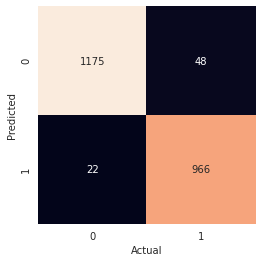

In [ ]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1223
           1       0.95      0.98      0.97       988

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

